# Lab Assignment 6
#### This Lab task is to completed individually, Please Add your Name and ID Below, please comment your code thoroughly and name your variables wisely. (Grade out of 23, 3 marks for commented organized code.)
- Name: Ramandeep Kaur 
- ID: 8976849

### Question 1- DATA INTEGRATION:  (5)
Check the files inside microbiome folder, (MID1, MID2, ... , MID9.xls files), you need to combine those files into single dataframe.<br>
Then You will need to add to this dataframe the relevant metadata information from metadata.csv <br>
Each folder represents information from different bacteria, MID1, MID2, ...
<br>
__Inspect the files before answering the question__


Import necessary libereries 

In [47]:
import pandas as pd
import numpy as np

# Loading Dataset

In [48]:

# Initializing an empty array to store DataFrames
dfs = []

# Looping through the range 1 to 10 
for i in range(1, 10): # Iterate over 9 files (MID1 to MID9)
     # Reading the DataFrame from an Excel file during each iteration
    df = pd.read_excel(f"./data/microbiome/MID{i}.xls", header=None)

    # Naming the columns of the DataFrame as "Bacteria" and "Count"
    df.columns = ["Bacteria", "Count"]

    # Adding the DataFrame to the array
    dfs.append(df)

    # Adding a new column "BARCODE" filled with the value of the file name (MID1 to MID9)
    dfs[i-1]['BARCODE'] = f'MID{i}' 

# Combining Datasets

In [49]:

# Concatenating all the MID files' DataFrames stored in the 'dfs' array into a single DataFrame
data = pd.concat(dfs)

data

,Bacteria,Count,BARCODE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,MID1
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2,MID1
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3,MID1
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3,MID1
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7,MID1
...,...,...,...
276,"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Geotoga",43,MID9
277,"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Kosmotoga",16,MID9
278,"Bacteria ""Verrucomicrobia"" Opitutae Opitutales Opitutaceae Opitutus",1,MID9
279,Bacteria Cyanobacteria Cyanobacteria Chloroplast Chlorarachniophyceae,1,MID9


In [50]:
# reading metadata
meta_data = pd.read_csv("data/microbiome/metadata.csv")

meta_data

,BARCODE,GROUP,SAMPLE
0,MID1,EXTRACTION CONTROL,NaN
1,MID2,NEC 1,tissue
2,MID3,Control 1,tissue
3,MID4,NEC 2,tissue
4,MID5,Control 2,tissue
5,MID6,NEC 1,stool
6,MID7,Control 1,stool
7,MID8,NEC 2,stool
8,MID9,Control 2,stool


In [51]:

# Merging metadata with the combined MID DataFrame using the common column 'BARCODE'
# The 'pd.merge()' function is used to handle the merge operation

meta_data_merge = pd.merge(data, meta_data)

meta_data_merge

,Bacteria,Count,BARCODE,GROUP,SAMPLE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,MID1,EXTRACTION CONTROL,NaN
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2,MID1,EXTRACTION CONTROL,NaN
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3,MID1,EXTRACTION CONTROL,NaN
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3,MID1,EXTRACTION CONTROL,NaN
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7,MID1,EXTRACTION CONTROL,NaN
...,...,...,...,...,...
2391,"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Geotoga",43,MID9,Control 2,stool
2392,"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Kosmotoga",16,MID9,Control 2,stool
2393,"Bacteria ""Verrucomicrobia"" Opitutae Opitutales Opitutaceae Opitutus",1,MID9,Control 2,stool
2394,Bacteria Cyanobacteria Cyanobacteria Chloroplast Chlorarachniophyceae,1,MID9,Control 2,stool


### Question 2- Feature Engineering - Attribute Correlation (15)
- Load the file income_data.csv, inspect the columns.
- Determine if race and education features have a statistical relationship. 
- Explain and conclude your findings (7 till here)
- Inspect the dataset carefully and create an Indicator Feature (0/1) --(3 marks here)
- Inspect the dataset carefully and create an Interaction Feature (Additional feature engineered from your dataset)-- (3 marks here)<br>
__The features you create must be resonable, please add an explanation to explain why did you chose those features__  (2)

In [52]:
# Importing the necessary libraries for statistical analysis and visualization
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [53]:
# Reading the income dataset from a CSV file
income_data = pd.read_csv('./data/income_data.csv')

# Displaying the columns and data in the income dataset
income_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Inspecting

In [54]:
# Inspecting
# Displaying information about the structure and data types of the income dataset
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


We can see that we have only int64 (6 cols), object (9 cols) datatypes in the dataset.

Initially, it looks that the dataset has appropriate datatypes in each column

# Relationship between Race and Education

In [55]:
education_race = pd.crosstab(income_data['race'], income_data['education'])
education_race

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
race,,,,,,,,,,,,,,,,
Amer-Indian-Eskimo,22,26,5,4,2,10,9,13,31,29,3,176,13,1,2,124
Asian-Pac-Islander,16,27,15,10,28,14,10,49,53,408,46,336,140,7,58,302
Black,182,252,105,24,41,90,111,161,165,504,16,1780,143,12,21,1078
Other,11,22,17,13,23,23,15,10,9,50,3,105,13,2,5,85
White,1158,1485,515,196,415,818,611,1368,1803,7034,526,13387,2348,61,748,9289


In [56]:
# Performing a chi-square test of independence on the 'education_race' contingency table
chi_square, p, d_o_f, expected = chi2_contingency(education_race)

# Checking for a statistical relationship between race and education
if p < 0.05:  
    print(f"There is a statistical relation between race and education with a significane of {p:.1e}")
else:
    print(f"There is no statistical relation between race and education with a significane of {p:.1e}")

There is a statistical relation between race and education with a significane of 7.5e-179


# Findings and Conclusion

In [57]:
missing_values = income_data.isnull().sum()
print(missing_values)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


We can see that there are no missing values in the dataset

In [58]:
income_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


We can see that with: 'max' stats we have few possible outliers by an assumption.

As capital-gain by 99999 might be incorrect, similarly for age, hours-per-week

In [59]:
# Initializing a list to store unique values for each column
unique_values = []

# Iterating over columns and collecting unique values
for col_name, col_data in income_data.items():
       # Getting the unique values for each column
    unique_val = col_data.unique()
   # Appending column name and its unique values as a tuple to the list
    unique_values.append((col_name, unique_val))

# Creating a DataFrame to display the unique values for each column
unique_values_df = pd.DataFrame(unique_values, columns=['Column', 'Unique_Values'])

# Displaying the table of unique values for each column
pd.set_option('display.max_colwidth', None)
unique_values_df

,Column,Unique_Values
0,age,"[25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20, 37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30, 47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77, 80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85, 76, 84, 89, 88, 87, 86]"
1,workclass,"[Private, Local-gov, ?, Self-emp-not-inc, Federal-gov, State-gov, Self-emp-inc, Without-pay, Never-worked]"
2,fnlwgt,"[226802, 89814, 336951, 160323, 103497, 198693, 227026, 104626, 369667, 104996, 184454, 212465, 82091, 299831, 279724, 346189, 444554, 128354, 60548, 85019, 107914, 238588, 132015, 220931, 205947, 432824, 236427, 134446, 99516, 109282, 106444, 186651, 188274, 258120, 43311, 191846, 403681, 248446, 269430, 257509, 136384, 120277, 465326, 103634, 138371, 242832, 290208, 186272, 201062, 131916, 54440, 280215, 214399, 54164, 219446, 110677, 145985, 382078, 170721, 269705, 101135, 118429, 31208, 281384, 171807, 109912, 445382, 105460, 170338, 102606, 323887, 175622, 229636, 388946, 269034, 165361, 75012, 174379, 312477, 72055, 67001, 213734, 83141, 223881, 113752, 170482, 244689, 160631, 228724, 38434, 292946, 77443, 176410, 98984, 198751, 479296, 235218, 164877, 272087, 169699, ...]"
3,education,"[11th, HS-grad, Assoc-acdm, Some-college, 10th, Prof-school, 7th-8th, Bachelors, Masters, Doctorate, 5th-6th, Assoc-voc, 9th, 12th, 1st-4th, Preschool]"
4,educational-num,"[7, 9, 12, 10, 6, 15, 4, 13, 14, 16, 3, 11, 5, 8, 2, 1]"
5,marital-status,"[Never-married, Married-civ-spouse, Widowed, Divorced, Separated, Married-spouse-absent, Married-AF-spouse]"
6,occupation,"[Machine-op-inspct, Farming-fishing, Protective-serv, ?, Other-service, Prof-specialty, Craft-repair, Adm-clerical, Exec-managerial, Tech-support, Sales, Priv-house-serv, Transport-moving, Handlers-cleaners, Armed-Forces]"
7,relationship,"[Own-child, Husband, Not-in-family, Unmarried, Wife, Other-relative]"
8,race,"[Black, White, Asian-Pac-Islander, Other, Amer-Indian-Eskimo]"
9,gender,"[Male, Female]"



This approach offers a clear perspective on the content of each column, allowing us to understand the dataset's various aspects. Simultaneously, it provides an overview of all unique values present.

When combined with the .info method, this approach delivers precise information about the dataset, especially when a detailed description is unavailable.

The following columns are particularly insightful and can be considered independent attributes: workclass, education, marital-status, occupation, relationship, race, gender, native-country, income.


# Conclusion


The dataset focuses on working professionals, encompassing individuals from various countries and age groups. It provides insights into their background, qualifications, and various other characteristics.

Potential outliers may be present in the dataset.

Numerous features in the dataset exhibit both independent and dependent relationships. Through extensive analysis, we can uncover various underlying relationships that characterize the dataset.


# Indicator Feature

In [60]:
income_data[(income_data['capital-loss'] > 0) & (income_data['capital-gain'] > 0)]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


When we check if there is any case where if have both capital-gain, capital-loss occur together. Hence we either have a additional-income or not.

In [61]:
# Result  is 'True' if value greater than 0
income_data['additional-income'] = income_data['capital-gain'].apply(lambda x: 'True' if x > 0 else 'False')
income_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,additional-income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,True
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,False
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,False
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,False
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,False


# Conclusion
Adding a indicator feature which checks if there was any additional capital gain by the person, and represent it as either 'true' or 'false' in a separate column 'additional income'

# Interaction Feature

After reviewing the dataset, there appears to be a potential correlation between education and hours-per-week, mirroring real-life expectations.

It is reasonable to hypothesize that individuals with lower educational levels may tend to contribute fewer hours-per-week to their work. This assumption sets the stage for further analysis to explore and validate the relationship between education and working hours within the dataset.

In [62]:
# Grouping the data by education and calculating the total hours per week
education_hours_relation = income_data.groupby('education')['hours-per-week'].sum().reset_index()

# Sorting the data by the total hours per week in descending order
education_hours_relation = education_hours_relation.sort_values(by='hours-per-week', ascending=False)

# Displaying the resulting DataFrame
education_hours_relation

,education,hours-per-week
11,HS-grad,641474
15,Some-college,422782
9,Bachelors,340922
12,Masters,115781
8,Assoc-voc,85858
7,Assoc-acdm,65336
1,11th,61522
0,10th,51374
14,Prof-school,39681
5,7th-8th,37248


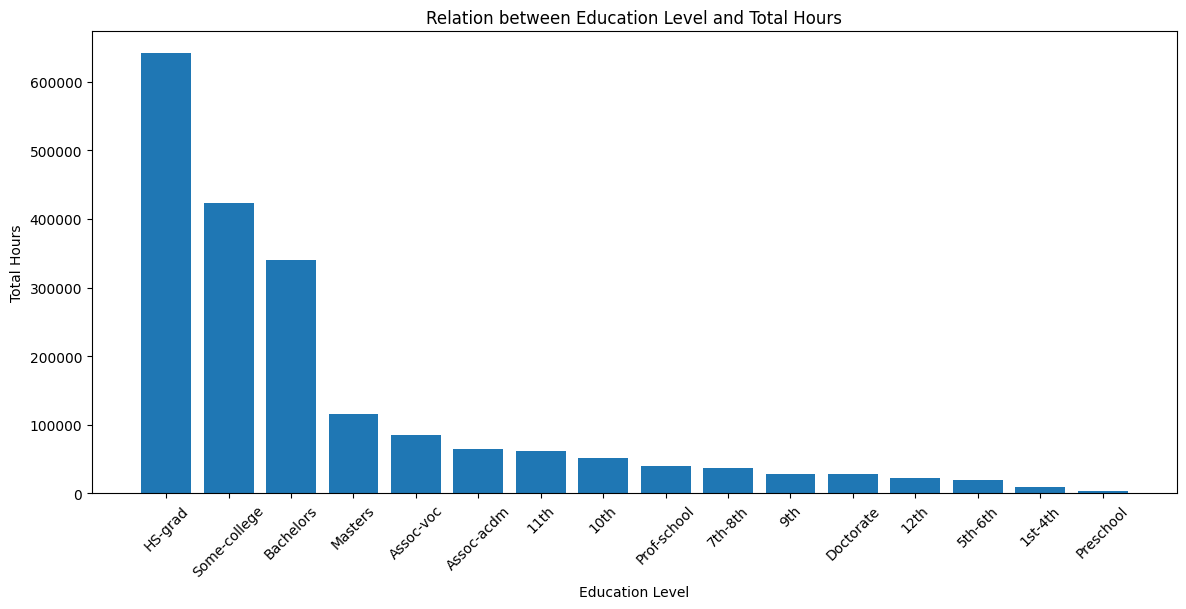

In [63]:
# Plotting
plt.figure(figsize=(14, 6))
plt.bar(education_hours_relation['education'], education_hours_relation['hours-per-week'])

# Setting the axis, title
plt.xlabel('Education Level')
plt.ylabel('Total Hours')
plt.title('Relation between Education Level and Total Hours')
plt.xticks(rotation=45)

plt.show()

#Conclusion

Upon examining the graph, it becomes evident that individuals classified as HS-Grad, likely representing high school graduates, contribute the highest number of work hours. Following this group are those with some-college education, and then individuals with bachelor's degrees.

This observation aligns with the initial assumption that individuals with lower levels of education tend to contribute fewer working hours.

This analysis unveils valuable insights within the dataset, shedding light on nuanced patterns that are not explicitly defined. Further exploration is warranted to draw conclusive insights and deepen our understanding of this relationship.